<a href="https://colab.research.google.com/github/Radhikakhot66-VCTI/Python_libraries/blob/Pavan/L9_customBuffer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install geopandas shapely fiona matplotlib --quiet

In [18]:
import geopandas as gpd
import fiona
from shapely.geometry import shape
import matplotlib.pyplot as plt

In [19]:
# ✅ Safe GeoJSON reader
def read_geojson_safe(path):
    with fiona.open(path) as src:
        crs = src.crs
        features = list(src)
    records = []
    for f in features:
        geom = shape(f['geometry'])
        props = f['properties']
        props['geometry'] = geom
        records.append(props)
    return gpd.GeoDataFrame(records, crs=crs)

In [20]:
# ✅ Load your files
soil_path = "/content/drive/MyDrive/Colab Notebooks/soil_data_be 1.geojson"
network_path = "/content/drive/MyDrive/Colab Notebooks/VCTI_abc_network 5.geojson"

soil_gdf = read_geojson_safe(soil_path)
network_gdf = read_geojson_safe(network_path)


/tmp/ipython-input-19-3674387186.py:10: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['geometry'] = geom


In [21]:
soil_sample = soil_gdf.iloc[:5].copy()
network_sample = network_gdf.iloc[:5].copy()


/tmp/ipython-input-22-1315876865.py:5: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


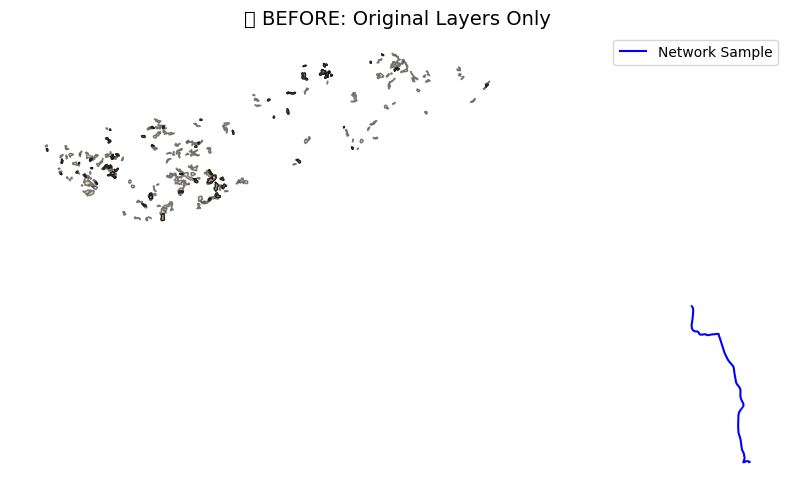

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
soil_sample.plot(ax=ax, color='tan', edgecolor='black', alpha=0.5, label="Soil Sample")
network_sample.plot(ax=ax, color='blue', markersize=40, label="Network Sample")
plt.title("📍 BEFORE: Original Layers Only", fontsize=14)
plt.legend()
plt.axis("off")
plt.show()


In [27]:
soil_proj = soil_sample.to_crs(epsg=3857)
network_proj = network_sample.to_crs(epsg=3857)


In [29]:
network_proj["buffer_100m"] = network_proj.buffer(100)


In [30]:
intersected_soils = soil_proj[soil_proj.intersects(network_proj.unary_union)]
print(f"✅ Intersected Soil Polygons: {len(intersected_soils)}")


✅ Intersected Soil Polygons: 0


/tmp/ipython-input-30-2431519658.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  intersected_soils = soil_proj[soil_proj.intersects(network_proj.unary_union)]


/tmp/ipython-input-32-1951605553.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  intersected_soils.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, label="Intersected Soil")
/tmp/ipython-input-32-1951605553.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


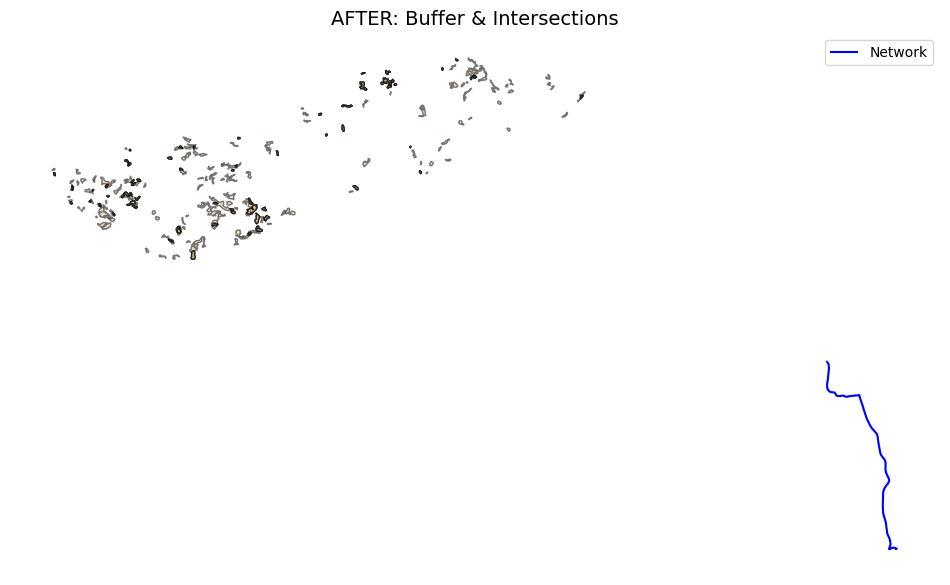

In [32]:
fig, ax = plt.subplots(figsize=(12, 10))

soil_proj.plot(ax=ax, color='tan', edgecolor='black', alpha=0.5, label="Soil")
network_proj.set_geometry("buffer_100m").plot(ax=ax, color='skyblue', alpha=0.4, label="Buffer (100m)")
network_proj.set_geometry("geometry").plot(ax=ax, color='blue', markersize=30, label="Network")
intersected_soils.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, label="Intersected Soil")

plt.title("AFTER: Buffer & Intersections", fontsize=14)
plt.axis("off")
plt.legend()
plt.show()
